# K-mean Clustering (Partition Method)

https://builtin.com/data-science/data-clustering-python

https://www.kaggle.com/shwetabh123/mall-customers?select=Mall_Customers.csv

In [1]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1tbLbkA2UCqsDKnyRCu32t7stQqBoJLQO' -O Mall_Customers.csv

--2023-09-24 06:54:47--  https://docs.google.com/uc?export=download&id=1tbLbkA2UCqsDKnyRCu32t7stQqBoJLQO
Resolving docs.google.com (docs.google.com)... 74.125.137.139, 74.125.137.138, 74.125.137.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.137.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-28-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/tcrhfmlr3r5g7n4lqd1dfds342f5nsp1/1695538425000/05830297694632628921/*/1tbLbkA2UCqsDKnyRCu32t7stQqBoJLQO?e=download&uuid=09481e17-e666-4ced-82e2-0c21dd9a4c86 [following]
--2023-09-24 06:54:47--  https://doc-04-28-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/tcrhfmlr3r5g7n4lqd1dfds342f5nsp1/1695538425000/05830297694632628921/*/1tbLbkA2UCqsDKnyRCu32t7stQqBoJLQO?e=download&uuid=09481e17-e666-4ced-82e2-0c21dd9a4c86
Resolving doc-04-28-docs.googleusercontent.com (doc-04-28-docs.googleusercontent.com)... 142.251.2.132, 2607:f8b0:4

In [2]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
df = pandas.read_csv("Mall_Customers.csv")

print(df)

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [4]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
X = df[['Age', 'Spending Score (1-100)']].copy()

In [6]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

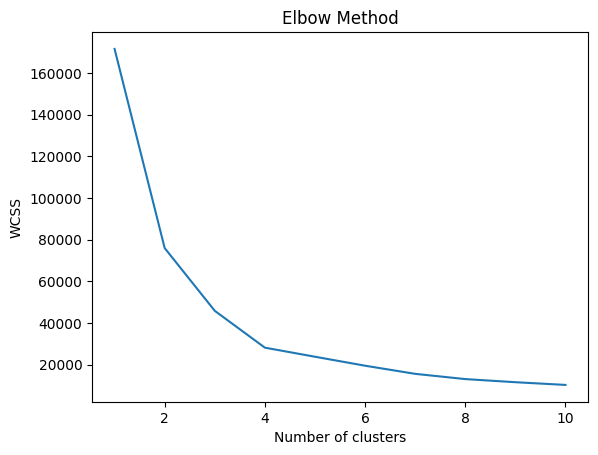

In [7]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

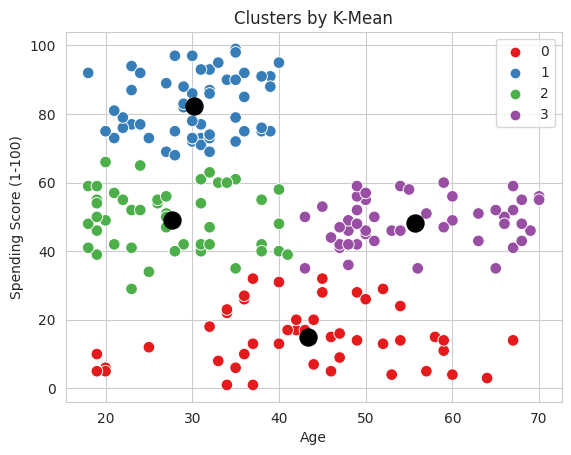

In [8]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)

sns.set_style('whitegrid')
sns.scatterplot(data = X, x = "Age", y = "Spending Score (1-100)", hue = pred_y, palette='Set1', s=70)
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150, c='black')
plt.title('Clusters by K-Mean')
plt.show()

In [9]:
print(kmeans.cluster_centers_[:, 0])
print(kmeans.cluster_centers_[:, 1])

[43.29166667 30.1754386  27.61702128 55.70833333]
[15.02083333 82.35087719 49.14893617 48.22916667]


#Exercise
Cluster with Spending Score (1-100) and Annual Income (k$)?


In [10]:
# -- TO DO --
# Set data X with Spending Score (1-100) and Annual Income (k$) column
X = df[['Spending Score (1-100)', 'Annual Income (k$)']].copy()

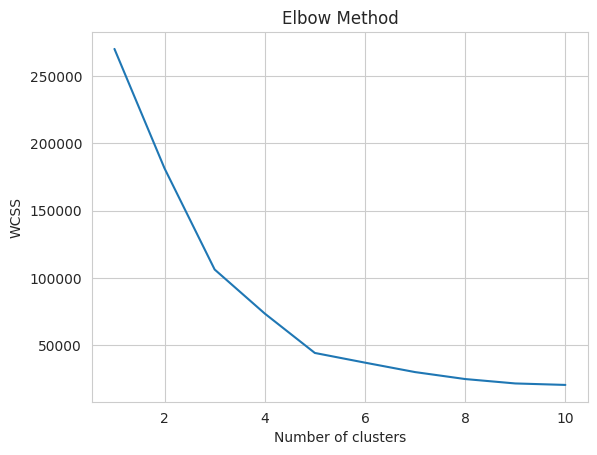

In [11]:
# -- TO DO --
# Find the Elbow Point
wcss = []  # Within-Cluster Sum of Square
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Square
plt.show()

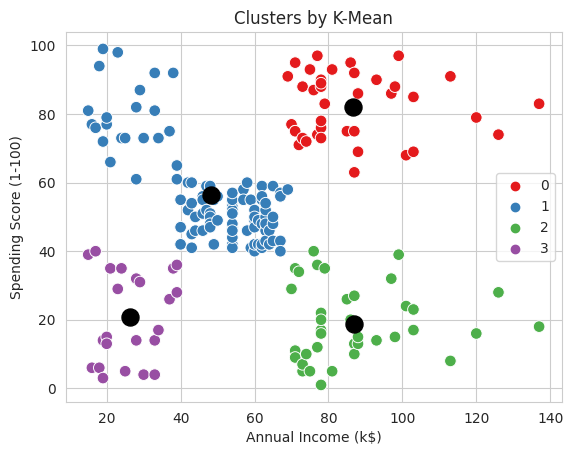

In [12]:
# -- TO DO --
# Clustering with kmeans and plot scatter
# Assuming you found the elbow point at 4 clusters, then:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)

sns.set_style('whitegrid')
sns.scatterplot(data=X, x='Annual Income (k$)', y='Spending Score (1-100)', hue=pred_y, palette='Set1', s=70)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s=150, c='black')  # Plotting cluster centers
plt.title('Clusters by K-Mean')
plt.show()

In [13]:
# -- TO DO --
# print cluster center
print("Cluster Centers:")
print("Spending Score (1-100): ", kmeans.cluster_centers_[:, 0])
print("Annual Income (k$): ", kmeans.cluster_centers_[:, 1])

Cluster Centers:
Spending Score (1-100):  [82.12820513 56.48       18.63157895 20.91304348]
Annual Income (k$):  [86.53846154 48.26       87.         26.30434783]


#Exercise

Cluster with 3 attributes: Age, Spending Score (1-100), Annual Income (k$)

In [14]:
# -- TO DO --
# Set data X with 3 attributes: Age, Spending Score (1-100), Annual Income (k$)
X = df[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']].copy()

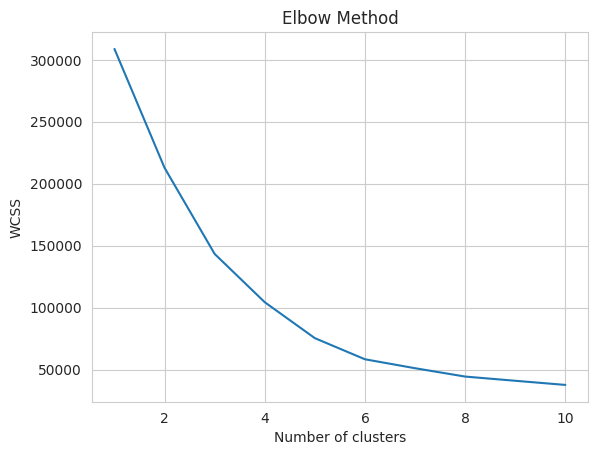

In [15]:
# -- TO DO --
# Find Elbow Point
wcss = []  # Within-Cluster Sum of Square
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

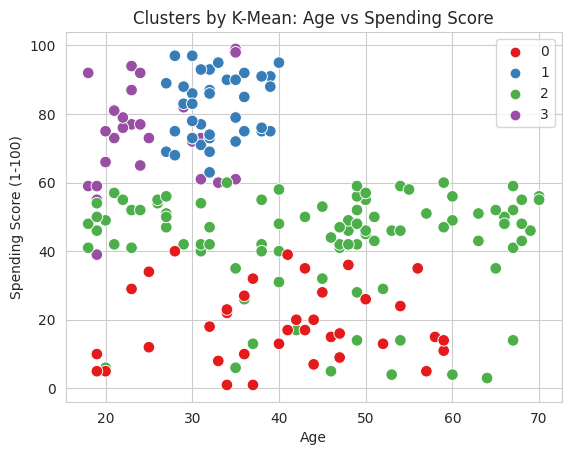

In [16]:
# -- TO DO --
# Clustering with kmeans and plot scatter with Age and Spending Score
# Assuming you found the elbow point at, say 4 clusters, then:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)

sns.scatterplot(data=X, x='Age', y='Spending Score (1-100)', hue=pred_y, palette='Set1', s=70)
plt.title('Clusters by K-Mean: Age vs Spending Score')
plt.show()

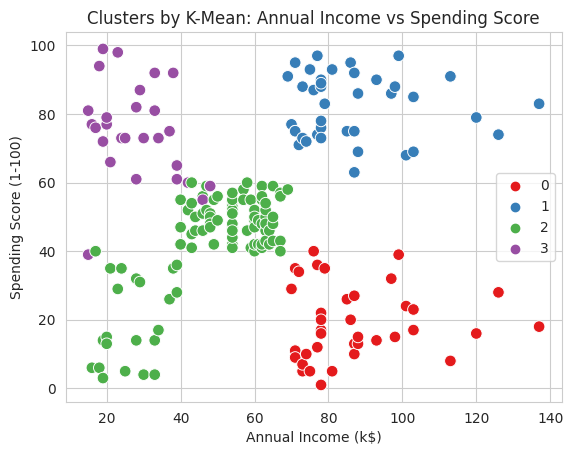

In [17]:
# -- TO DO --
#  plot scatter with Annual Income (k$) and Spending Score
sns.scatterplot(data=X, x='Annual Income (k$)', y='Spending Score (1-100)', hue=pred_y, palette='Set1', s=70)
plt.title('Clusters by K-Mean: Annual Income vs Spending Score')
plt.show()

In [18]:
# -- TO DO --
# print cluster center
print("Cluster Centers:")
print("Age: ", kmeans.cluster_centers_[:, 0])
print("Spending Score (1-100): ", kmeans.cluster_centers_[:, 1])
print("Annual Income (k$): ", kmeans.cluster_centers_[:, 2])

Cluster Centers:
Age:  [40.39473684 32.69230769 44.89473684 24.82142857]
Spending Score (1-100):  [18.63157895 82.12820513 42.63157895 74.25      ]
Annual Income (k$):  [87.         86.53846154 48.70526316 28.71428571]


#Exercise

Cluster the data "Phone and Internet Customer Data.xlsx" with K-mean

In [20]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1H0vP_zbJvWD4mWHc1595ICYSAnmsY-cN' -O 'Phone and Internet Customer Data.xlsx'

--2023-09-24 07:09:54--  https://docs.google.com/uc?export=download&id=1H0vP_zbJvWD4mWHc1595ICYSAnmsY-cN
Resolving docs.google.com (docs.google.com)... 74.125.137.101, 74.125.137.138, 74.125.137.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.137.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-28-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ul78a9e32m7l8njsc7kkb2r0l92rs1sh/1695539325000/05830297694632628921/*/1H0vP_zbJvWD4mWHc1595ICYSAnmsY-cN?e=download&uuid=0aa8cb4c-d9b0-4dcb-ad2f-6206399461d7 [following]
--2023-09-24 07:09:55--  https://doc-08-28-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ul78a9e32m7l8njsc7kkb2r0l92rs1sh/1695539325000/05830297694632628921/*/1H0vP_zbJvWD4mWHc1595ICYSAnmsY-cN?e=download&uuid=0aa8cb4c-d9b0-4dcb-ad2f-6206399461d7
Resolving doc-08-28-docs.googleusercontent.com (doc-08-28-docs.googleusercontent.com)... 142.251.2.132, 2607:f8b0:4

In [21]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [22]:
df = pandas.read_excel("Phone and Internet Customer Data.xlsx")

print(df.head())

  Customer ID  Gender   Region  Weeks in Contract  Day Mins  Intl Mins  \
0  0265-EDXBD    Male    North         438.035681     272.1        8.5   
1  0422-OHQHQ  Female    South         403.096028     283.9       10.0   
2  0732-OCQOC  Female     West         426.991374     286.7        6.9   
3  0771-WLCLA  Female    South         427.307906     273.4       12.3   
4  0939-YAPAF  Female  Central         418.381933     293.0       10.0   

   Night Mins  Day Calls  Intl Calls  Night Calls  sumChargeAmount  \
0       213.8        111          10          105            58.18   
1       196.3         98           4           85            59.79   
2       192.9        100           5          122            59.28   
3       245.8        141           6          112            60.86   
4       143.9         88           6           87            58.99   

   Day Charge  Intl Charge  Night Charge Churn Status  
0       46.26         2.30          9.62        Loyal  
1       48.26         

In [23]:
df.isnull().sum()

Customer ID          0
Gender               0
Region               0
Weeks in Contract    0
Day Mins             0
Intl Mins            0
Night Mins           0
Day Calls            0
Intl Calls           0
Night Calls          0
sumChargeAmount      0
Day Charge           0
Intl Charge          0
Night Charge         0
Churn Status         0
dtype: int64

In [24]:
# -- TO DO ---
# Drop columns Customer ID,Gender,Region,Churn Status in df dataframe
df.drop(columns=['Customer ID', 'Gender', 'Region', 'Churn Status'], inplace=True)

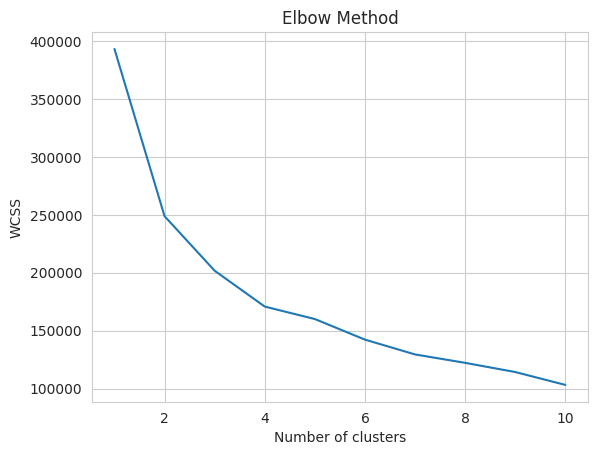

In [25]:
# -- TO DO --
# Find Elbow Point
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

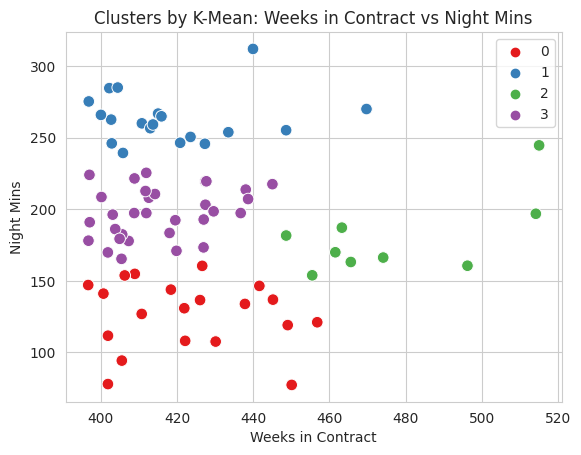

In [26]:
# -- TO DO --
# Clustering with kmeans and plot scatter with Weeks in Contract and Night Mins
# Assuming you found the elbow point at, say 4 clusters, then:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df)

sns.scatterplot(data=df, x='Weeks in Contract', y='Night Mins', hue=pred_y, palette='Set1', s=70)
plt.title('Clusters by K-Mean: Weeks in Contract vs Night Mins')
plt.show()

# DBSCAN Clustering (Density-Based Method)

In [27]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1H0vP_zbJvWD4mWHc1595ICYSAnmsY-cN' -O 'Phone and Internet Customer Data.xlsx'

--2023-09-24 07:11:10--  https://docs.google.com/uc?export=download&id=1H0vP_zbJvWD4mWHc1595ICYSAnmsY-cN
Resolving docs.google.com (docs.google.com)... 142.250.141.102, 142.250.141.101, 142.250.141.138, ...
Connecting to docs.google.com (docs.google.com)|142.250.141.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-28-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/k42hiecm75og95o2hdmgdmtqvfood365/1695539400000/05830297694632628921/*/1H0vP_zbJvWD4mWHc1595ICYSAnmsY-cN?e=download&uuid=3625cbb3-00f7-41aa-a785-d217b49903ac [following]
--2023-09-24 07:11:10--  https://doc-08-28-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/k42hiecm75og95o2hdmgdmtqvfood365/1695539400000/05830297694632628921/*/1H0vP_zbJvWD4mWHc1595ICYSAnmsY-cN?e=download&uuid=3625cbb3-00f7-41aa-a785-d217b49903ac
Resolving doc-08-28-docs.googleusercontent.com (doc-08-28-docs.googleusercontent.com)... 142.251.2.132, 2607:f8

In [28]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pandas.read_excel("Phone and Internet Customer Data.xlsx")
print(df.to_string())

   Customer ID  Gender   Region  Weeks in Contract  Day Mins  Intl Mins  Night Mins  Day Calls  Intl Calls  Night Calls  sumChargeAmount  Day Charge  Intl Charge  Night Charge Churn Status
0   0265-EDXBD    Male    North         438.035681     272.1        8.5       213.8        111          10          105            58.18       46.26         2.30          9.62        Loyal
1   0422-OHQHQ  Female    South         403.096028     283.9       10.0       196.3         98           4           85            59.79       48.26         2.70          8.83        Loyal
2   0732-OCQOC  Female     West         426.991374     286.7        6.9       192.9        100           5          122            59.28       48.74         1.86          8.68        Loyal
3   0771-WLCLA  Female    South         427.307906     273.4       12.3       245.8        141           6          112            60.86       46.48         3.32         11.06        Loyal
4   0939-YAPAF  Female  Central         418.381933     

In [30]:
X = df[['Weeks in Contract', 'Night Mins']].copy()
X

,Weeks in Contract,Night Mins
0,438.035681,213.8
1,403.096028,196.3
2,426.991374,192.9
3,427.307906,245.8
4,418.381933,143.9
...,...,...
74,396.815805,275.4
75,436.706379,197.4
76,418.026069,183.5
77,400.660122,141.1


In [31]:
from sklearn.cluster import DBSCAN

DBSCAN_cluster = DBSCAN(eps=15, min_samples=3)
DBSCAN_cluster.fit(X)

DBSCAN_cluster.labels_

array([ 0,  0,  0,  1,  0,  1,  1,  0,  0,  2,  0,  1,  0,  0, -1, -1,  0,
        0, -1,  0,  0,  0, -1,  1,  0,  0,  1, -1, -1,  0,  1,  0,  0,  0,
        0,  1,  0,  1,  0,  1,  0,  1,  2,  0,  0,  0,  0,  0,  1,  1,  0,
       -1, -1,  0,  1,  0, -1,  0, -1, -1,  0, -1,  0, -1, -1, -1,  0,  0,
       -1,  0,  2,  2,  1,  0,  1,  0,  0,  0,  0])

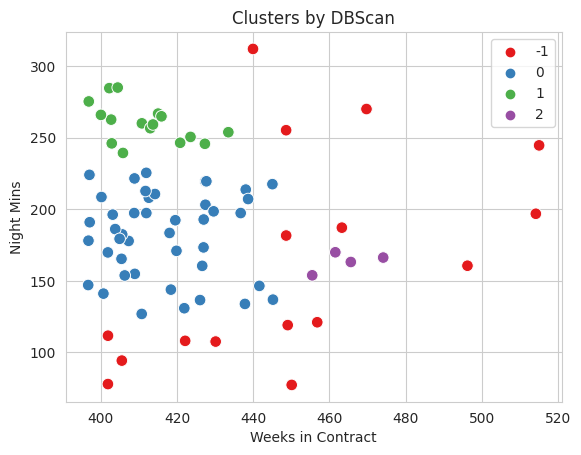

In [32]:
sns.set_style('whitegrid')
sns.scatterplot(x='Weeks in Contract', y='Night Mins', data=X, hue=DBSCAN_cluster.labels_, palette='Set1', s=70)
plt.title('Clusters by DBScan')
plt.show()